<a href="https://colab.research.google.com/github/jchen8000/MLDLwithPython/blob/main/3_02_Calculus/Function_Derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function and Derivatives

## Derivative of a function

SymPy is a library for symbolic mathematics, it will show the symbolic expressions. Here we use SymPy to obtain the derivative of a function.
Say there is a function $f(x)=2x^2+x+1$, SymPy can give us a symbolic expression of its derivative.

In [ ]:
%pip install \
  numpy==2.0.2 \
  matplotlib==3.10.0 \
  sympy==1.14.0

In [46]:
import sympy as sym

def function(x):
    return 2*x**2 + x + 1

x = sym.Symbol('x')
f = function(x)
f_derivative = sym.diff( f )
print("The function:  ", f)
print("The derivative:", f_derivative)

The function:   2*x**2 + x + 1
The derivative: 4*x + 1


In [47]:
f

2*x**2 + x + 1

In [48]:
f_derivative

4*x + 1

In [49]:
def function2(x):
    return sym.sin(x)

x = sym.Symbol('x')
f = function2(x)
f_derivative = sym.diff( f )
print("The function:  ", f)
print("The derivative:", f_derivative)

The function:   sin(x)
The derivative: cos(x)


In [50]:
def function3(x):
    return sym.cos(x)

x = sym.Symbol('x')
f = function3(x)
f_derivative = sym.diff( f )
print("The function:  ", f)
print("The derivative:", f_derivative)

The function:   cos(x)
The derivative: -sin(x)


## Plot the function and derivative

For example, ther is a function as below:

Function: $f(x)=2x^2+x+1$

its derivative: $f'(x)=4x+1$

Set show_derivative = True to display both function and derivative.

Set show_derivative = False to display both function only.



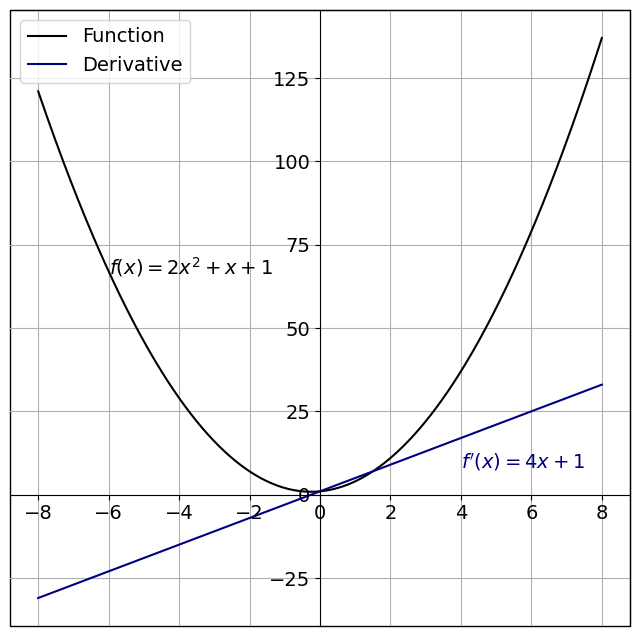

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

show_derivative = True

# --- define the function symbolically ---
x_sym = sym.Symbol('x')
f_sym = 2*x_sym**2 + x_sym + 1          # f(x) = 2x^2 + x + 1
f_derivative_sym = sym.diff(f_sym, x_sym)  # f'(x) = 4x + 1

# --- convert symbolic expressions to numpy-callable functions ---
function = sym.lambdify(x_sym, f_sym, 'numpy')
deriv = sym.lambdify(x_sym, f_derivative_sym, 'numpy')

# --- plotting ---
fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams['font.size'] = '14'

# range on x-axis
x = np.linspace(-8, 8, 400)

# plot function
ax.plot(x, function(x), color='k', label='Function')

# plot derivative
if show_derivative:
    ax.plot(x, deriv(x), color='navy', label='Derivative')

# axis styling
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.0)
ax.grid(True)

# annotate
ax.text(-6.0, 66.0, r"$f(x)="+sym.latex(f_sym)+"$", color='k')
if show_derivative:
    ax.text(4.0, 8.0, r"$f'(x)="+sym.latex(f_derivative_sym)+"$", color='navy')
    ax.legend(loc='upper left')

plt.savefig("function_derivatives.svg", format="svg", dpi=300, bbox_inches='tight')
plt.show()


## Multivariate Function


Multivariate function has more than one independent variables, here is an example with two variables:

$f(x_1, x_2) = \large\frac{1}{2}x_1^2 + x_2^2 + x_1 + x_2$

In [52]:
def multivariate_function(x1, x2):
    return 0.5*x1**2 + x2**2 + x1 + x2

Plot the function and see how it looks like:

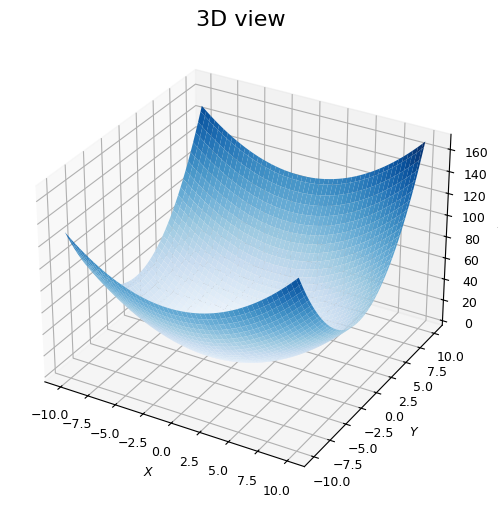

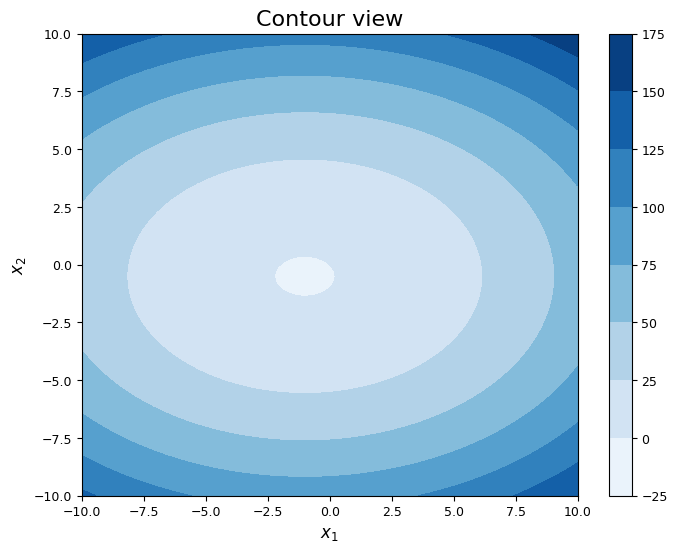

In [53]:
from mpl_toolkits import mplot3d

plt.rcParams['savefig.transparent'] = True
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['font.size'] = 9

sample = 100
x1 = np.linspace(-10, 10, sample)
x2 = np.linspace(-10, 10, sample)
x1, x2 = np.meshgrid(x1, x2)
y = multivariate_function(x1, x2)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='Blues', linewidth=0)
plt.title("3D view", fontsize=16)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.axis('on')
# plt.savefig("multivariate_function_3d.png", dpi=150, format="png", transparent=True)
plt.savefig("multivariate_function_3d.svg", format="svg", transparent=True)
plt.show()

plt.figure(figsize=(8,6))
plt.title("Contour view", fontsize=16)
plt.contourf(x1, x2, y,cmap='Blues')
plt.colorbar()
plt.savefig("multivariate_function_ctr.svg", format="svg", transparent=True)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.show()

In [54]:
x1, x2 = sym.symbols('x1 x2')
f = multivariate_function(x1, x2)

df1 = sym.diff(f, x1)
df2 = sym.diff(f, x2)
print("The function:", f)
print("Partial derivative of x1:", df1)
print("Partial derivative of x2:", df2)

The function: 0.5*x1**2 + x1 + x2**2 + x2
Partial derivative of x1: 1.0*x1 + 1
Partial derivative of x2: 2*x2 + 1


In [55]:
df1

1.0*x1 + 1

In [56]:
df2

2*x2 + 1